# Density-based spatial clustering of applications with noise (DBSCAN) / Основанная на плотности пространственная кластеризация для приложений с шумами

---

**Источники:**


[Density-based spatial clustering of applications with noise (DBSCAN)](https://en.wikipedia.org/wiki/DBSCAN)

[Основанная на плотности пространственная кластеризация для приложений с шумами](https://ru.wikipedia.org/wiki/DBSCAN)

[DBSCAN](https://scikit-learn.org/stable/modules/clustering.html#dbscan)

[Интересные алгоритмы кластеризации, часть вторая: DBSCAN](https://habr.com/ru/post/322034/)

[]()

[]()

[]()

[]()

[]()

---

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
# !conda install basemap matplotlib -y

In [4]:
# !conda install -c conda-forge umap-learn -y

In [5]:
import numpy as np

np.__version__

'1.20.2'

In [6]:
import pandas as pd

pd.__version__

'1.2.4'

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

matplotlib.__version__

'3.3.4'

In [8]:
import seaborn as sns

sns.__version__

'0.11.1'

In [9]:
import umap
from umap import UMAP

umap.__version__

'0.5.1'

In [10]:
import sklearn

from sklearn.decomposition import PCA

from sklearn.preprocessing import QuantileTransformer

sklearn.__version__

'0.24.2'

## Описание

DBSCAN — это алгоритм кластеризации данных, который предложили Маритин Эстер, Ганс-Петер Кригель, Ёрг Сандер и Сяовэй Су в 1996.

**Подходит для данных, содержащих кластеры одинаковой плотности.**

Это алгоритм кластеризации, **основанной на плотности** — если дан набор точек в некотором пространстве, алгоритм **группирует точки, которые тесно расположены** (точки со многими близкими соседями), **помечая как выбросы** точки, которые находятся одиноко в областях с малой плотностью (ближайшие соседи которых лежат далеко).

**DBSCAN является одним из наиболее часто используемых алгоритмов кластеризации, и наиболее часто упоминается в научной литературе.**

В 2014 алгоритм получил премию "проверено временем (test of time)" (премия даётся алгоритмам, которые получили существенное внимание в теории и практике) на ведущей конференции по интеллектуальному анализу данных.


Самые важные гиперпараметры [sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html):

- **`eps (default=0.5)`** - максимальное расстояние между двумя примерами (samples), чтобы один считался соседним с другим. Это не максимальная граница расстояний до точек в кластере. Это наиболее важный параметр DBSCAN, который нужно выбрать в соответствии с набором данных и функцией расстояния (`metric`).

- **`min_samples (default=5)`** - количество примеров (samples) или общий вес в окрестности точки, которая будет считаться базовой точкой. Сюда входит и сама точка.

Любая задача интеллектуальной обработки данных имеет проблему параметров. 

Любой параметр специфично влияет на алгоритм. Для алгоритма DBSCAN нужны параметры `eps`  и `min_samples`.

**В идеале, значение `eps`  определяется решаемой задачей (например, физические расстояния), а `min_samples` определяет тогда минимальный желаемый размер кластера.**

**OPTICS** можно рассматривать как **обобщение DBSCAN**, в котором параметр **`eps`  заменяется максимальным значением**, наиболее воздействущим на эффективность. **`min_samples` тогда становится минимальным размером кластера**. 

Хотя алгоритм **OPTICS** существенно проще в области выбора параметров, чем DBSCAN, его результаты труднее использовать, так как он обычно даёт иерархическую кластеризацию вместо простого разделения, которое даёт DBSCAN.

### Рекомендации по выбору гиперпараметров `eps`  и `min_samples`

- **`min_samples`**

    - Минимальное значение `min_samples` может быть получено из размерности `D` (например, 2D, 3D, 8D = количество признаков) набора данных как $min\_samples \geqslant D +1$. 
    
    - Низкое значение $min\_samples=1$ не имеет смысла, так как тогда любая точка будет кластером.
    
    - Для $min\_samples \leqslant 2$ результат будет тем же самым, что и иерархическая кластеризация с метрикой единичного соединения с отсечением дендрограммы на высоте `eps`.
    
    - **`min_samples` должен быть равным как минимум 3**. 
    
    - Для наборов данных **с шумами бо́льшие значения `min_samples` обычно лучше**, и дают более существенные кластеры. 
    
    - Эмпирика показывает, что может быть использовано значение $min\_samples = 2 * D$, но может оказаться необходимым **выбор большего значения для больших наборов данных**, для данных с шумом или для данных, содержащих много дубликатов.
 

- **`eps`**

    - Значение `eps` может быть выбрано с помощью графа k-расстояний, вычерчивая расстояние `k` ($k = min\_samples - 1$) ближайшему соседу в порядке от большего к меньшему.
    
    - **Хорошие значения `eps` те, где график имеет "изгиб"**.
    
    - **Если `eps` выбрана слишком малыми, большая часть данных не будет кластеризована, а для слишком больших значений `eps`  кластеры будут сливаться и большинство объектов окажутся в одном кластере**.
    
    - Обычно **малые значения `eps`  предпочтительнее** и опыт показывает, что только небольшая доля точек должна быть с этим расстоянием друг от друга.
    
    - Альтернативно, может быть использован график OPTICS для выбора `eps`, но тогда и сам алгоритм OPTICS может быть использован для кластеризации.
    
- **`metric`**: 

    - Выбор функции расстояния сильно связан с выбором `eps` и имеет большое влияние на результаты.
    
    - Обычно сначала необходимо определить обоснованные меры похожести набора данных, прежде чем выбирать параметр `eps`.
    
    - Нет оценок для этого параметра, но **функции расстояния следует выбирать согласно набору данных**.
    
    - Например, для географических данных, расстояние по дуге большого круга часто будет хорошим выбором.

### Преимущества

- DBSCAN **не требует указать число кластеров** в данных априори в отличие от метода k-средних.

- DBSCAN может найти **кластеры произвольной формы**. 
    - DBSCAN может найти даже кластеры полностью окружённые (но не связанные с) другими кластерами.
    - Благодаря параметру `min_samples` уменьшается так называемый эффект одной связи (связь различных кластеров тонкой линией точек).


- DBSCAN имеет понятие шума и **устойчив к выбросам**.

- DBSCAN требует лишь двух параметров и большей частью **нечувствителен к порядку точек** в наборе данных.
    - Однако, точки, находящиеся на границе двух различных кластеров могут оказаться в другом кластере, если изменить порядок точек, а назначение кластеров единственно с точностью до [изоморфизма](https://ru.wikipedia.org/wiki/%D0%98%D0%B7%D0%BE%D0%BC%D0%BE%D1%80%D1%84%D0%B8%D0%B7%D0%BC).


- DBSCAN разработан для применения с базами данных, которые позволяют ускорить запросы в диапазоне значений, например, с помощью [R*-дерева](https://ru.wikipedia.org/wiki/R*-%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D0%BE).

- Параметры `min_samples` и `eps`  могут быть установлены экспертами в рассматриваемой области, если данные хорошо понимаются.

### Недостатки

- DBSCAN **не полностью однозначен — краевые точки, которые могут быть достигнуты из более чем одного кластера, могут принадлежать любому из этих кластеров, что зависит от порядка просмотра точек**.
    - Для большинства наборов данных эти ситуации возникают редко и имеют малое влияние на результат кластеризации — основные точки и шум DBSCAN обрабатывает однозначно. 
    - Существует версия DBSCAN, которая трактует краевые точки как шум и тем самым достигается полностью однозначный результат, а также более согласованная статистическая интерпретация связных по плотности компонент.

- Качество DBSCAN **зависит от измерения расстояния (`metric`)**.
    - Наиболее часто используемой метрикой расстояний является евклидова метрика. 
    - Особенно для кластеризации **данных высокой размерности евклидова метрика может оказаться почти бесполезной** ввиду так называемого "[проклятия размерности](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%BE%D0%BA%D0%BB%D1%8F%D1%82%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8)", что делает трудным делом нахождение подходящего значения `eps`. 
    - Этот эффект, однако, присутствует в любом другом алгоритме, основанном на евклидовом расстоянии.

- DBSCAN не может хорошо кластеризовать наборы данных **с большой разницей в плотности**, поскольку не удается выбрать приемлемую для всех кластеров комбинацию `min_samples` и `eps`.

- Если данные и масштаб не вполне хорошо поняты, **выбор осмысленного порога расстояния `eps`  может оказаться трудным**.

## Загрузка данных

[Источник (custDatasets)](https://www.kaggle.com/gangliu/custdatasets).

In [11]:
df = pd.read_csv('./../../data/Cust_Segmentation.csv', index_col=0)
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4


## Анализ данных

См. лекцию [02_pca](../../08_modeling_ml_demensionality_reduction/lectures/02_pca.ipynb)

## Подготовка данных

In [12]:
df['Defaulted'].fillna(0, inplace=True)
df['Defaulted'] = df['Defaulted'].astype(int)
df['Defaulted'].isna().sum()

0

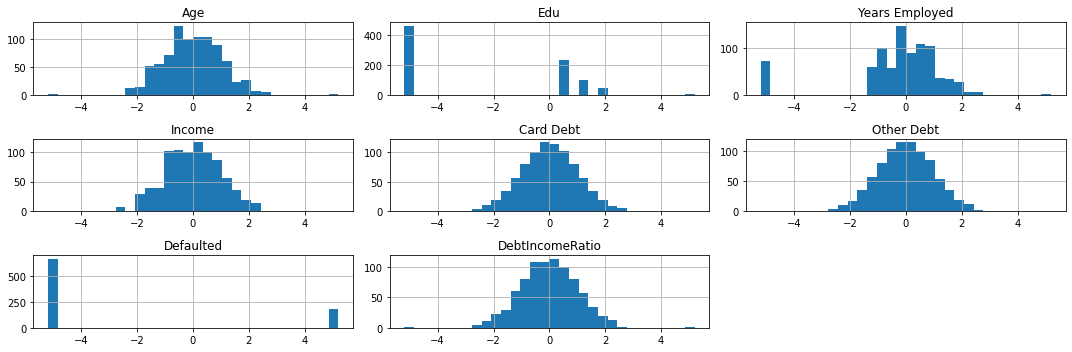

In [13]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
norm_trans = QuantileTransformer(output_distribution='normal', n_quantiles=100)
df_norm = pd.DataFrame(norm_trans.fit_transform(df[num_cols]), columns=num_cols)
df_norm.hist(bins=30, figsize=(15, 5))
plt.tight_layout()

## 3-D PCA

In [14]:
pca_3 = PCA(n_components=3)
df_pca_3 = pd.DataFrame(pca_3.fit_transform(df_norm))

In [15]:
%matplotlib widget
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-135, elev=35)

ax.scatter(df_pca_3[0], df_pca_3[1], df_pca_3[2],
           alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [16]:
%matplotlib inline

## 3-D UMAP

In [17]:
umap_3 = UMAP(n_components=3)
df_umap_3 = pd.DataFrame(umap_3.fit_transform(df_norm))

In [18]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=25, elev=35)

ax.scatter(df_umap_3[0], df_umap_3[1], df_umap_3[2], alpha=0.3)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [19]:
%matplotlib inline

## Выбор `min_samples`

In [20]:
df_norm

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0.731217,0.458679,-0.178175,-1.275817,-1.529084,-0.643500,-5.199338,-0.430727
1,1.335178,-5.199338,2.104286,1.470545,1.470956,1.472335,-5.199338,0.531969
2,-0.152506,0.458679,0.362241,0.713143,1.773029,1.136136,5.199338,1.446225
3,-0.619855,0.458679,-0.515705,-1.275817,-0.205803,-1.335723,-5.199338,-0.430727
4,1.335178,-5.199338,2.572352,2.380597,2.201906,1.543663,-5.199338,-0.242903
...,...,...,...,...,...,...,...,...
845,-0.927754,-5.199338,-0.335333,-0.515705,-0.404273,-0.494490,-5.199338,-0.311038
846,-0.781781,0.458679,-0.037988,-0.037988,-0.733799,0.013092,-5.199338,-0.269066
847,-1.220640,1.807354,-5.199338,-1.434200,1.053891,0.517952,5.199338,2.404824
848,-0.242903,-5.199338,0.589456,-0.348756,-1.592328,-1.083895,-5.199338,-1.275817


In [21]:
min_samples = len(df_norm.columns) + 1
min_samples

9

## Выбор `eps`

In [22]:
from sklearn.neighbors import NearestNeighbors

# рассчитать среднее расстояние между каждой точкой 
# в наборе данных и ее min_samples ближайшими соседями 
neighbors = NearestNeighbors(n_neighbors=min_samples-1)
neighbors_fit = neighbors.fit(df_norm)
distances, indices = neighbors_fit.kneighbors(df_norm)

In [23]:
# сортировка значений расстояний по возрастанию и построение графика
distances = np.sort(distances, axis=0)

In [24]:
distances = distances[:, 1]

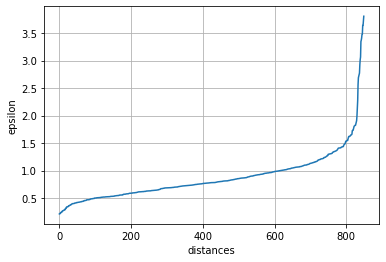

In [25]:
# оптимальное значение для epsilon будет найдено 
# в точке максимальной кривизны
plt.plot(distances)
plt.xlabel('distances')
plt.ylabel('epsilon')
plt.grid(True)

In [26]:
epsilon=1.7

## Построение модели

In [27]:
from sklearn.cluster import DBSCAN

In [28]:
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(df_norm)
labels = db.labels_
labels

array([ 0,  1,  2,  0,  1,  1,  0, -1,  1,  0, -1,  0,  1,  1,  2,  1,  1,
        0,  1,  1,  0,  0,  2,  1,  0,  1,  1,  1,  0,  0,  0,  0, -1,  0,
        1,  0,  2, -1,  1,  0, -1,  0,  0, -1,  1,  0,  1,  1,  1,  0,  1,
        1,  3, -1,  2,  3,  3,  0,  1,  1,  1,  1,  1,  0,  0,  1,  1,  3,
        1,  3,  0,  0,  0,  0,  1,  1,  1,  0,  0,  0,  1, -1,  0,  1,  0,
       -1,  4,  0,  2, -1,  0,  0, -1,  3,  0,  0,  1,  1,  2,  4,  3,  0,
        1,  3,  2,  1,  1,  1,  0,  0,  1, -1,  1, -1,  1,  0,  1,  1,  0,
        1,  0,  0,  0,  0,  1,  1,  0,  0,  1, -1,  1,  1,  0,  0,  1,  0,
        0,  1,  1,  2,  2,  4,  0,  1,  3,  0,  1,  2,  0,  0,  1,  1,  2,
        1,  0,  1,  1,  1,  2,  2,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,
        0,  1,  0, -1,  1, -1,  1,  1,  2,  1,  2,  0,  1, -1,  2,  0,  1,
        1,  1, -1,  1,  1, -1, -1,  0,  0,  4,  1,  2, -1,  1, -1,  2,  1,
        1, -1,  0,  1,  1,  2,  1,  1,  1, -1,  1,  3,  2, -1,  1,  1,  5,
        0,  0,  4,  1,  1

<AxesSubplot:ylabel='count'>

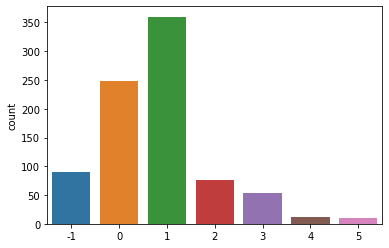

In [29]:
sns.countplot(x=labels)

In [30]:
clusters = np.unique(labels)
clusters

array([-1,  0,  1,  2,  3,  4,  5])

## Анализ результатов

### 3-D PCA

In [31]:
%matplotlib widget
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-125, elev=35)

ax.scatter(df_pca_3[0], df_pca_3[1], df_pca_3[2], 
           c=labels, 
           alpha=0.3, 
           cmap='hsv', 
           s=60)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [32]:
%matplotlib inline

### 3-D UMAP

In [33]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D    
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=142, elev=35)

ax.scatter(df_umap_3[0], df_umap_3[1], df_umap_3[2], 
           c=labels, 
           alpha=0.3, 
           cmap='hsv', 
           s=60)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [34]:
%matplotlib inline

### Анализ "представителей" кластеров

In [35]:
df["Cluster"] = labels
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
1,41,2,6,19,0.124,1.073,0,NBA001,6.3,0
2,47,1,26,100,4.582,8.218,0,NBA021,12.8,1
3,33,2,10,57,6.111,5.802,1,NBA013,20.9,2
4,29,2,4,19,0.681,0.516,0,NBA009,6.3,0
5,47,1,31,253,9.308,8.908,0,NBA008,7.2,1
...,...,...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,0,NBA007,6.8,1
847,28,2,7,34,0.359,2.021,0,NBA002,7.0,0
848,25,4,0,18,2.802,3.210,1,NBA001,33.4,-1


In [36]:
df.groupby('Cluster').mean().round(2)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Cluster,,,,,,,,
-1,36.16,2.11,5.17,51.49,2.39,3.85,0.47,12.14
0,36.17,2.44,9.38,57.41,1.52,3.28,0.00,8.68
1,35.53,1.00,10.42,42.06,1.21,2.57,0.00,9.08
2,33.57,2.47,5.60,46.58,2.59,4.54,1.00,14.34
3,30.98,1.00,5.69,29.41,1.75,2.82,1.00,15.17
4,22.91,2.73,0.00,22.18,0.76,0.99,0.00,7.74
5,25.20,2.50,0.00,24.20,1.00,1.87,1.00,12.12


In [37]:
df_clusters = {}
cluster_examples = pd.DataFrame()

for c in clusters:
    print(f'Cluster = {c}')
    df_clusters[c] = df[df.Cluster == c]
    cluster_examples = cluster_examples.append(df[df.Cluster == c].head(1))
    display(cluster_examples)
    display(df_clusters[c])
    display(df_clusters[c].describe())
    print('\n', '=' * 100, '\n')

Cluster = -1


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
8,42,3,0,64,0.279,3.945,0,NBA009,6.6,-1


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
8,42,3,0,64,0.279,3.945,0,NBA009,6.6,-1
11,44,3,8,88,0.285,5.083,1,NBA010,6.1,-1
33,23,2,0,42,1.019,0.619,1,NBA001,3.9,-1
38,37,1,0,18,1.584,0.738,1,NBA018,12.9,-1
41,20,1,4,14,0.201,1.157,1,NBA000,9.7,-1
...,...,...,...,...,...,...,...,...,...,...
819,35,2,0,35,2.383,1.957,0,NBA006,12.4,-1
827,48,1,13,50,6.114,9.286,1,NBA020,30.8,-1
829,45,3,0,22,0.030,0.894,0,NBA019,4.2,-1


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.0
mean,36.155556,2.111111,5.166667,51.488889,2.387778,3.850056,0.466667,12.144444,-1.0
std,10.699061,1.344522,8.525243,63.987928,4.013474,5.339863,0.501683,9.644596,0.0
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000,-1.0
25%,27.000000,1.000000,0.000000,19.000000,0.293000,0.740500,0.000000,4.850000,-1.0
50%,34.500000,1.000000,0.000000,28.500000,0.810000,1.846500,0.000000,9.550000,-1.0
75%,46.000000,3.000000,8.750000,63.000000,2.287000,5.064750,1.000000,17.250000,-1.0
max,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000,-1.0




Cluster = 0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
8,42,3,0,64,0.279,3.945,0,NBA009,6.6,-1
1,41,2,6,19,0.124,1.073,0,NBA001,6.3,0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
1,41,2,6,19,0.124,1.073,0,NBA001,6.3,0
4,29,2,4,19,0.681,0.516,0,NBA009,6.3,0
7,38,2,4,56,0.442,0.454,0,NBA013,1.6,0
10,47,3,23,115,0.653,3.947,0,NBA011,4.0,0
12,34,2,9,40,0.374,0.266,0,NBA003,1.6,0
...,...,...,...,...,...,...,...,...,...,...
837,23,2,3,24,0.552,0.960,0,NBA004,6.3,0
841,38,3,13,25,0.343,1.082,0,NBA018,5.7,0
842,29,3,7,63,0.572,2.893,0,NBA001,5.5,0


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
count,248.000000,248.000000,248.000000,248.00000,248.000000,248.000000,248.0,248.000000,248.0
mean,36.165323,2.439516,9.379032,57.41129,1.520649,3.282496,0.0,8.683065,0.0
std,7.579063,0.670648,6.152045,39.85612,1.714352,3.227654,0.0,5.622550,0.0
min,21.000000,2.000000,1.000000,14.00000,0.025000,0.156000,0.0,0.600000,0.0
25%,30.000000,2.000000,5.000000,30.00000,0.418500,1.097500,0.0,4.400000,0.0
50%,35.000000,2.000000,8.000000,44.00000,0.945500,2.207500,0.0,7.350000,0.0
75%,41.000000,3.000000,13.000000,71.50000,1.880250,4.366000,0.0,12.125000,0.0
max,54.000000,4.000000,31.000000,266.00000,9.877000,18.269000,0.0,32.400000,0.0




Cluster = 1


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
8,42,3,0,64,0.279,3.945,0,NBA009,6.6,-1
1,41,2,6,19,0.124,1.073,0,NBA001,6.3,0
2,47,1,26,100,4.582,8.218,0,NBA021,12.8,1


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
2,47,1,26,100,4.582,8.218,0,NBA021,12.8,1
5,47,1,31,253,9.308,8.908,0,NBA008,7.2,1
6,40,1,23,81,0.998,7.831,0,NBA016,10.9,1
9,26,1,5,18,0.575,2.215,0,NBA006,15.5,1
13,24,1,7,18,0.526,0.643,0,NBA000,6.5,1
...,...,...,...,...,...,...,...,...,...,...
843,32,1,14,36,0.273,0.591,0,NBA000,2.4,1
845,41,1,7,43,0.694,1.198,0,NBA011,4.4,1
846,27,1,5,26,0.548,1.220,0,NBA007,6.8,1


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
count,360.000000,360.0,360.000000,360.000000,360.000000,360.000000,360.0,360.000000,360.0
mean,35.527778,1.0,10.422222,42.058333,1.210317,2.569392,0.0,9.082222,1.0
std,7.372259,0.0,6.553364,29.658867,1.411559,2.440188,0.0,5.694738,0.0
min,21.000000,1.0,1.000000,14.000000,0.025000,0.101000,0.0,0.400000,1.0
25%,30.000000,1.0,5.000000,24.000000,0.320500,1.012500,0.0,4.900000,1.0
50%,35.000000,1.0,9.500000,33.000000,0.771500,1.811500,0.0,8.000000,1.0
75%,40.250000,1.0,15.000000,50.250000,1.469000,3.030500,0.0,12.000000,1.0
max,55.000000,1.0,31.000000,254.000000,10.679000,16.668000,0.0,32.500000,1.0




Cluster = 2


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
8,42,3,0,64,0.279,3.945,0,NBA009,6.6,-1
1,41,2,6,19,0.124,1.073,0,NBA001,6.3,0
2,47,1,26,100,4.582,8.218,0,NBA021,12.8,1
3,33,2,10,57,6.111,5.802,1,NBA013,20.9,2


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
3,33,2,10,57,6.111,5.802,1,NBA013,20.9,2
15,28,3,2,20,0.233,1.647,1,NBA000,9.4,2
23,28,3,6,47,5.574,3.732,1,NBA008,19.8,2
37,35,3,5,37,0.581,1.417,1,NBA003,5.4,2
55,29,3,5,70,3.176,10.754,1,NBA006,19.9,2
...,...,...,...,...,...,...,...,...,...,...
744,31,2,6,32,3.341,4.051,1,NBA006,23.1,2
773,26,2,2,24,1.577,1.687,1,NBA006,13.6,2
794,29,3,7,84,6.912,4.512,1,NBA002,13.6,2


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0,77.000000,77.0
mean,33.571429,2.467532,5.597403,46.584416,2.593961,4.535909,1.0,14.340260,2.0
std,7.295328,0.619516,4.434493,38.202146,2.817241,5.013479,0.0,6.887389,0.0
min,21.000000,2.000000,1.000000,15.000000,0.119000,0.468000,1.0,2.400000,2.0
25%,28.000000,2.000000,2.000000,25.000000,0.538000,1.473000,1.0,8.600000,2.0
50%,32.000000,2.000000,4.000000,36.000000,1.584000,3.001000,1.0,14.800000,2.0
75%,40.000000,3.000000,7.000000,55.000000,3.491000,5.077000,1.0,19.200000,2.0
max,49.000000,4.000000,18.000000,221.000000,15.792000,27.034000,1.0,36.600000,2.0




Cluster = 3


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
8,42,3,0,64,0.279,3.945,0,NBA009,6.6,-1
1,41,2,6,19,0.124,1.073,0,NBA001,6.3,0
2,47,1,26,100,4.582,8.218,0,NBA021,12.8,1
3,33,2,10,57,6.111,5.802,1,NBA013,20.9,2
53,24,1,3,19,1.358,3.278,1,NBA004,24.4,3


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
53,24,1,3,19,1.358,3.278,1,NBA004,24.4,3
56,34,1,2,25,0.573,2.577,1,NBA011,12.6,3
57,32,1,1,20,0.315,0.645,1,NBA000,4.8,3
68,26,1,4,27,2.472,0.363,1,NBA003,10.5,3
70,24,1,3,14,0.838,1.416,1,NBA000,16.1,3
94,29,1,1,20,0.569,3.151,1,NBA002,18.6,3
101,30,1,7,33,1.165,7.217,1,NBA002,25.4,3
104,44,1,5,48,1.970,2.350,1,NBA003,9.0,3
145,34,1,12,68,7.817,9.251,1,NBA005,25.1,3


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
count,54.000000,54.0,54.000000,54.000000,54.000000,54.000000,54.0,54.000000,54.0
mean,30.981481,1.0,5.685185,29.407407,1.749111,2.824630,1.0,15.174074,3.0
std,7.069709,0.0,4.681655,14.591958,1.696725,2.213401,0.0,7.264418,0.0
min,22.000000,1.0,1.000000,14.000000,0.073000,0.226000,1.0,2.500000,3.0
25%,25.000000,1.0,2.000000,19.000000,0.576500,1.358250,1.0,9.925000,3.0
50%,29.500000,1.0,4.000000,24.000000,1.417500,2.335500,1.0,14.600000,3.0
75%,34.000000,1.0,9.000000,39.000000,2.391750,3.572750,1.0,19.875000,3.0
max,53.000000,1.0,19.000000,76.000000,9.593000,9.591000,1.0,30.700000,3.0




Cluster = 4


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
8,42,3,0,64,0.279,3.945,0,NBA009,6.6,-1
1,41,2,6,19,0.124,1.073,0,NBA001,6.3,0
2,47,1,26,100,4.582,8.218,0,NBA021,12.8,1
3,33,2,10,57,6.111,5.802,1,NBA013,20.9,2
53,24,1,3,19,1.358,3.278,1,NBA004,24.4,3
87,22,4,0,25,1.491,1.559,0,NBA001,12.2,4


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
87,22,4,0,25,1.491,1.559,0,NBA001,12.2,4
100,22,3,0,20,0.219,0.721,0,NBA002,4.7,4
142,23,2,0,21,0.455,1.372,0,NBA004,8.7,4
197,21,2,0,16,0.150,0.938,0,NBA001,6.8,4
224,23,4,0,23,0.468,1.073,0,NBA002,6.7,4
397,29,2,0,23,1.242,0.598,0,NBA007,8.0,4
434,22,3,0,18,0.478,0.908,0,NBA001,7.7,4
453,21,3,0,26,1.530,0.472,0,NBA001,7.7,4
550,22,2,0,20,0.207,0.913,0,NBA003,5.6,4


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
count,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,11.0,11.000000,11.0
mean,22.909091,2.727273,0.0,22.181818,0.758545,0.991091,0.0,7.736364,4.0
std,2.467977,0.786245,0.0,3.572623,0.534267,0.332346,0.0,1.977510,0.0
min,21.000000,2.000000,0.0,16.000000,0.150000,0.472000,0.0,4.700000,4.0
25%,21.500000,2.000000,0.0,20.000000,0.337000,0.814500,0.0,6.750000,4.0
50%,22.000000,3.000000,0.0,23.000000,0.478000,0.938000,0.0,7.700000,4.0
75%,23.000000,3.000000,0.0,24.500000,1.256500,1.203000,0.0,8.350000,4.0
max,29.000000,4.000000,0.0,28.000000,1.530000,1.559000,0.0,12.200000,4.0




Cluster = 5


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
8,42,3,0,64,0.279,3.945,0,NBA009,6.6,-1
1,41,2,6,19,0.124,1.073,0,NBA001,6.3,0
2,47,1,26,100,4.582,8.218,0,NBA021,12.8,1
3,33,2,10,57,6.111,5.802,1,NBA013,20.9,2
53,24,1,3,19,1.358,3.278,1,NBA004,24.4,3
87,22,4,0,25,1.491,1.559,0,NBA001,12.2,4
221,21,2,0,21,0.488,2.137,1,NBA002,12.5,5


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,,
221,21,2,0,21,0.488,2.137,1,NBA002,12.5,5
238,24,2,0,15,0.321,2.094,1,NBA002,16.1,5
318,31,2,0,27,1.089,2.367,1,NBA004,12.8,5
333,23,2,0,21,0.776,1.618,1,NBA002,11.4,5
415,22,2,0,35,0.781,2.369,1,NBA001,9.0,5
476,22,3,0,23,0.373,1.559,1,NBA000,8.4,5
502,28,2,0,29,2.148,1.709,1,NBA007,13.3,5
648,29,2,0,22,1.039,1.799,1,NBA008,12.9,5
797,25,4,0,24,1.597,1.307,1,NBA006,12.1,5


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
count,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.0,10.000000,10.0
mean,25.200000,2.500000,0.0,24.200000,1.003100,1.871500,1.0,12.120000,5.0
std,3.392803,0.849837,0.0,5.370702,0.584396,0.355685,0.0,2.182659,0.0
min,21.000000,2.000000,0.0,15.000000,0.321000,1.307000,1.0,8.400000,5.0
25%,22.250000,2.000000,0.0,21.250000,0.560000,1.640750,1.0,11.575000,5.0
50%,24.500000,2.000000,0.0,23.500000,0.910000,1.777500,1.0,12.600000,5.0
75%,27.750000,2.750000,0.0,26.500000,1.336500,2.126250,1.0,12.875000,5.0
max,31.000000,4.000000,0.0,35.000000,2.148000,2.369000,1.0,16.100000,5.0


#### 2-D

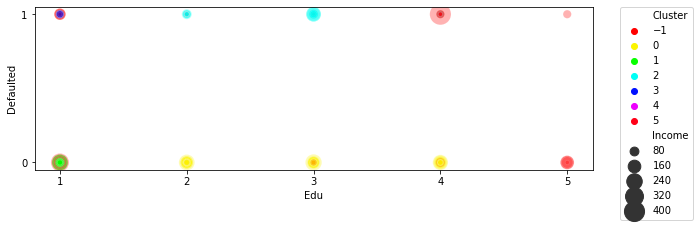

In [38]:
fig, ax = plt.subplots(figsize=(10, 3))

sns.scatterplot(x=df.Edu, 
                y=df.Defaulted, 
                size=df.Income, 
                sizes=(10, 450), 
                hue=df.Cluster, 
                palette='hsv', 
                alpha=0.3,
                ax=ax)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

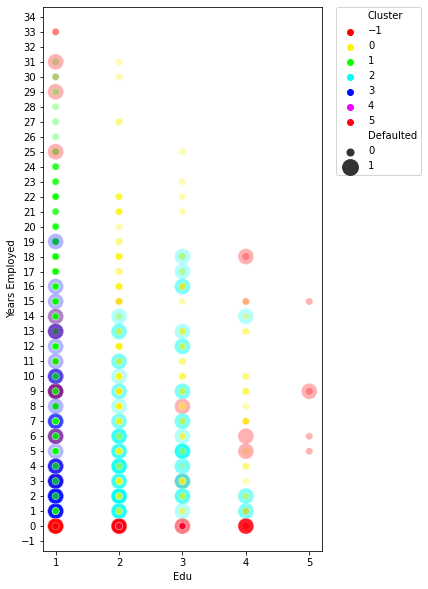

In [39]:
fig, ax = plt.subplots(figsize=(5, 10))

sns.scatterplot(x=df.Edu, 
                y=df['Years Employed'], #df.Defaulted, 
                size=df.Defaulted, 
                sizes=(250, 50), 
                hue=df.Cluster, 
                palette='hsv', 
                alpha=0.3,
                ax=ax)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### 3-D

In [40]:
%matplotlib widget
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-45, elev=25)


ax.scatter(df.Edu, df.Defaulted, df['Years Employed'], #df.Income, 
           c=df.Cluster,
           alpha=0.3, 
           s=60, 
           cmap='hsv')

ax.set_xlabel('Education')
ax.set_ylabel('Defaulted')
ax.set_zlabel('Years Employed')
# ax.set_zlabel('Income')


ax.scatter(cluster_examples.Edu, cluster_examples.Defaulted, cluster_examples['Years Employed'], marker='*',
           c="white", alpha=1, s=500, edgecolor='k')

for row, c in enumerate(cluster_examples.Cluster):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=400, edgecolor='k')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

NameError: name 'ax2' is not defined

In [ ]:
%matplotlib inline